In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2
import analyses.analysis as analysis
import analyses.process_generated_molecules as process_generated_molecules

In [ ]:
BASEDIR = "../potato_workdirs/tetris/"
BASEDIR = "../potato_workdirs/platonic_solids/"
BASEDIR = "../potato_workdirs/qm9_10JUL/"
BASEDIR = "../potato_workdirs/qm9_global_embedding_exp_with_noise/nequip/interactions=3/l=4/position_channels=5/channels=64/global_embed=False/"
BASEDIR = "../potato_workdirs/"

In [19]:
# Get results.
basedir = os.path.abspath(BASEDIR)
results = analysis.get_results_as_dataframe(basedir)
results


/Users/ameyad/Documents/spherical-harmonic-net/.venv/lib/python3.10/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


AttributeError: "'dataset'"

In [ ]:
sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=results,
    x="num_params",
    y="val_eval_final.position_loss",
    hue="max_l",
    style="max_l",
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L", loc="upper right")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Validation Loss")
plt.title("QM9")
plt.show();


# EDM Analyses

In [35]:
molecules_basedir = "/Users/ameyad/Documents/spherical-harmonic-net/analyses/analysed_workdirs/qm9_bessel_embedding"
preprocess = True
if preprocess:
    process_generated_molecules.process_molecules_dirs(molecules_basedir, relax_structures=False)
    
edm_analyses_results_orig = analysis.get_edm_analyses_results_as_dataframe(molecules_basedir, extract_hyperparams_from_path=True, read_as_sdf=True)

[23:01:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[23:01:49] Explicit valence for atom # 15 C, 5, is greater than permitted
[23:01:49] Explicit valence for atom # 15 C, 5, is greater than permitted
[23:01:50] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:01:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[23:01:50] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:01:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[23:01:50] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:01:50] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:01:50] Explicit valence for atom # 6 C, 5, is greater than permitted
[23:01:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[23:01:50] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:01:51] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:01:51] Explicit valence for atom # 9 O, 3, 

Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 

[23:04:27] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:04:27] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 2 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:04:27] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:04:27] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:04:27] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:04:27] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:04:27] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:04:27] Explicit valence for atom # 11 N, 4, i

Validity over 454 molecules: 76.87%
Uniqueness over 349 valid molecules: 99.71%
Novelty over 348 unique valid molecules: 87.64%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:04:53] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:04:53] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:04:53] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:04:53] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:04:53] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:04:53] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:04:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:04:53] Explicit valence for atom # 13 N,

Validity over 922 molecules: 94.47%
Uniqueness over 871 valid molecules: 96.10%
Novelty over 837 unique valid molecules: 66.67%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O wit

[23:05:20] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:05:20] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:05:20] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:05:20] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:05:20] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:05:20] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:05:20] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:05:20] Explicit valence for atom # 16 O, 3

Validity over 914 molecules: 85.56%
Uniqueness over 782 valid molecules: 98.21%
Novelty over 768 unique valid molecules: 66.28%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 1 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N wit

[23:05:45] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:05:45] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:05:45] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:05:45] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 19 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:05:45] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:05:45] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:05:45] Explicit valence for atom # 10 O, 

Validity over 850 molecules: 93.65%
Uniqueness over 796 valid molecules: 92.09%
Novelty over 733 unique valid molecules: 61.66%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C wit

[23:06:11] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:06:11] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:06:11] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 19 O, 3, is greater than permitted
[23:06:11] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:06:11] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:06:11] Explicit valence for atom # 2 O, 

Validity over 889 molecules: 91.56%
Uniqueness over 814 valid molecules: 97.79%
Novelty over 796 unique valid molecules: 65.83%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N wit

[23:06:24] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:06:24] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:06:24] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:06:24] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:06:24] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:06:24] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:06:24] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:06:24] Explicit valence for atom # 4 N, 4, 

Validity over 434 molecules: 82.03%
Uniqueness over 356 valid molecules: 99.44%
Novelty over 354 unique valid molecules: 76.84%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:06:51] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:06:51] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:06:51] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:06:51] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:06:51] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:06:51] Explicit valence for atom # 14 O, 

Validity over 932 molecules: 94.21%
Uniqueness over 878 valid molecules: 95.79%
Novelty over 841 unique valid molecules: 57.67%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C wit

[23:07:16] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:07:16] Explicit valence for atom # 2 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:07:16] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:07:16] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:07:16] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:07:16] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:07:16] Explicit valence for atom # 15 N, 4, 

Validity over 793 molecules: 86.00%
Uniqueness over 682 valid molecules: 98.39%
Novelty over 671 unique valid molecules: 82.41%
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O wit

[23:07:44] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:07:44] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:07:44] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:07:44] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:07:44] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:07:44] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:07:44] Explicit valence for atom # 10 

Validity over 911 molecules: 88.36%
Uniqueness over 805 valid molecules: 97.52%
Novelty over 785 unique valid molecules: 75.67%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C wit

[23:08:12] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 19 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:08:12] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:08:12] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:08:13] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:08:13] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:08:13] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:08:13] Explicit valence for atom # 9 

Validity over 903 molecules: 91.58%
Uniqueness over 827 valid molecules: 97.46%
Novelty over 806 unique valid molecules: 67.00%
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N wit

[23:08:21] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:08:21] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:08:21] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:08:21] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:08:21] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:08:21] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:08:21] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:08:21] Explicit valence for atom # 13 O, 3,

Validity over 282 molecules: 72.70%
Uniqueness over 205 valid molecules: 100.00%
Novelty over 205 unique valid molecules: 83.90%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N wi

[23:08:46] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:08:46] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:08:46] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:08:46] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:08:46] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 1 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:08:46] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:08:46] Explicit valence for atom # 4 N, 4, i

Validity over 851 molecules: 92.95%
Uniqueness over 791 valid molecules: 92.41%
Novelty over 731 unique valid molecules: 55.54%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:08:59] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:08:59] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:08:59] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:08:59] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:08:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:08:59] Explicit valence for atom # 6 O,

Validity over 397 molecules: 77.33%
Uniqueness over 307 valid molecules: 99.67%
Novelty over 306 unique valid molecules: 77.78%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N wit

[23:09:24] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:09:24] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 18 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:09:24] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:09:24] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:09:24] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:09:24] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:09:24] Explicit valence for atom # 16

Validity over 841 molecules: 83.47%
Uniqueness over 702 valid molecules: 99.86%
Novelty over 701 unique valid molecules: 77.18%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C wit

[23:09:33] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:09:33] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:09:33] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:09:33] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:09:33] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:09:33] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:09:33] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:09:33] Explicit valence for atom # 8 N, 4,

Validity over 270 molecules: 80.37%
Uniqueness over 217 valid molecules: 99.08%
Novelty over 215 unique valid molecules: 89.77%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule H with 0 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O wit

[23:09:57] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:09:57] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:09:57] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:09:57] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:09:57] Explicit valence for atom # 2 O, 3, is greater than permitted
[23:09:57] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:09:57] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:09:57] Explicit valence for atom # 11 O, 3,

Validity over 794 molecules: 87.66%
Uniqueness over 696 valid molecules: 99.71%
Novelty over 694 unique valid molecules: 71.90%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C wit

[23:10:24] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:10:24] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:10:24] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:10:24] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:10:24] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:10:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:10:24] Explicit valence for atom # 13 N,

Validity over 918 molecules: 91.83%
Uniqueness over 843 valid molecules: 98.34%
Novelty over 829 unique valid molecules: 70.21%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O wit

[23:10:53] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:10:53] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:10:53] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:10:53] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:10:53] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:10:53] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:10:53] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:10:53] Explicit valence for atom # 10 O

Validity over 925 molecules: 91.78%
Uniqueness over 849 valid molecules: 93.29%
Novelty over 792 unique valid molecules: 64.14%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:11:20] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:11:20] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:11:20] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:11:20] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:11:20] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:11:20] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:11:20] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:11:21] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:11:21] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:11:21] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:11:21] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:11:21] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:11:21] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:11:21] Explicit valence for atom # 3 O

Validity over 930 molecules: 92.58%
Uniqueness over 861 valid molecules: 96.98%
Novelty over 835 unique valid molecules: 69.34%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N wit

[23:11:49] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:11:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:11:49] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:11:49] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:11:49] Explicit valence for atom # 15 N, 4,

Validity over 913 molecules: 91.46%
Uniqueness over 835 valid molecules: 89.82%
Novelty over 750 unique valid molecules: 63.60%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule H wit

[23:11:56] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:11:56] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:11:56] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:11:56] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:11:56] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:11:56] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:11:56] Explicit valence for atom # 7 N, 4, 

Validity over 244 molecules: 74.18%
Uniqueness over 181 valid molecules: 98.90%
Novelty over 179 unique valid molecules: 91.06%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O wit

[23:12:19] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:12:19] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:12:19] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:12:19] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:12:19] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:12:19] Explicit valence for atom # 18 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:12:19] Explicit valence for atom # 10 O,

Validity over 804 molecules: 89.55%
Uniqueness over 720 valid molecules: 97.22%
Novelty over 700 unique valid molecules: 79.71%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O wit

[23:12:44] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:12:44] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:12:44] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:12:44] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:12:44] Explicit valence for atom # 13 N, 

Validity over 830 molecules: 90.00%
Uniqueness over 747 valid molecules: 97.59%
Novelty over 729 unique valid molecules: 61.18%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 4 bonds
Invalid bonds for molecule C with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O wit

[23:13:09] Explicit valence for atom # 2 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:13:09] Explicit valence for atom # 18 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:13:09] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:13:09] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:13:09] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:13:09] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:13:09] Explicit valence for atom # 9 N,

Validity over 830 molecules: 87.83%
Uniqueness over 729 valid molecules: 96.30%
Novelty over 702 unique valid molecules: 77.64%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:13:34] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:13:34] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:13:34] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:13:34] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:13:34] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:13:34] Explicit valence for atom # 20 O, 3, is greater than permitted
[23:13:34] Explicit valence for atom # 15 N, 

Validity over 824 molecules: 86.29%
Uniqueness over 711 valid molecules: 97.89%
Novelty over 696 unique valid molecules: 64.80%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:13:45] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:13:45] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:13:45] Explicit valence for atom # 16 N, 4,

Validity over 385 molecules: 77.66%
Uniqueness over 299 valid molecules: 99.67%
Novelty over 298 unique valid molecules: 81.21%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N wit

[23:14:12] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:14:12] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:14:12] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:14:12] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:14:12] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:14:12] Explicit valence for atom # 9 O

Validity over 939 molecules: 93.82%
Uniqueness over 881 valid molecules: 96.82%
Novelty over 853 unique valid molecules: 61.20%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 4 bonds
Invalid bonds for molecule C with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O wit

[23:14:40] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:14:40] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:14:40] Explicit valence for atom # 18 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 14 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:14:40] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:14:40] Explicit valence for atom # 6 O

Validity over 923 molecules: 91.66%
Uniqueness over 846 valid molecules: 89.83%
Novelty over 760 unique valid molecules: 61.97%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N wit

[23:15:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:15:08] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:15:08] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:15:08] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:15:08] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:15:08] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:15:08] Explicit valence for atom # 17 O

Validity over 925 molecules: 88.86%
Uniqueness over 822 valid molecules: 98.54%
Novelty over 810 unique valid molecules: 70.00%
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:15:33] Explicit valence for atom # 21 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 21 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:15:33] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:15:33] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:15:33] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 18 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:15:33] Explicit valence for atom # 18 O

Validity over 831 molecules: 91.58%
Uniqueness over 761 valid molecules: 99.08%
Novelty over 754 unique valid molecules: 66.31%
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C wit

[23:16:00] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:16:00] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:16:00] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:16:00] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:16:00] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:16:00] Explicit valence for atom # 2 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:16:00] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:16:00] Explicit valence for atom # 5 N, 

Validity over 889 molecules: 87.85%
Uniqueness over 781 valid molecules: 96.54%
Novelty over 754 unique valid molecules: 69.50%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule H with 0 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N wit

[23:16:26] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:16:26] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:16:26] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:16:26] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:16:26] Explicit valence for atom # 4 O, 3, is greater than permitted
[23:16:26] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:16:26] Explicit valence for atom # 2 O, 3, is greater than permitted
[23:16:26] Explicit valence for atom # 13 O, 3

Validity over 857 molecules: 90.20%
Uniqueness over 773 valid molecules: 97.54%
Novelty over 754 unique valid molecules: 79.31%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule N wit

[23:16:53] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:16:53] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:16:53] Explicit valence for atom # 3 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:16:53] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 20 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:16:53] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:16:53] Explicit valence for atom # 17 O, 3, is greater than permitted
[23:16:53] Explicit valence for atom # 14 

Validity over 865 molecules: 88.32%
Uniqueness over 764 valid molecules: 99.08%
Novelty over 757 unique valid molecules: 69.09%
Invalid bonds for molecule O with 1 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule O wit

[23:17:19] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:17:19] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 16 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:17:19] Explicit valence for atom # 9 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 8 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:17:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[23:17:19] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:17:19] Explicit valence for atom # 15 O, 

Validity over 930 molecules: 91.83%
Uniqueness over 854 valid molecules: 97.54%
Novelty over 833 unique valid molecules: 63.27%
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule O with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 2 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule C with 3 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule C with 5 bonds
Invalid bonds for molecule N with 4 bonds
Invalid bonds for molecule N wit

[23:17:47] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:17:47] Explicit valence for atom # 11 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 19 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 15 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 12 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:17:47] Explicit valence for atom # 7 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 6 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 13 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:17:47] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:17:47] Explicit valence for atom # 10 O, 3, is greater than permitted
[23:17:47] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:17:47] Explicit valence for atom # 7 O

Validity over 946 molecules: 94.50%
Uniqueness over 894 valid molecules: 96.09%
Novelty over 859 unique valid molecules: 69.50%


In [38]:
0.944685	* 0.960964

0.90780827634

In [37]:
edm_analyses_results_orig.sort_values(by="fraction_atoms_stable", ascending=False)[edm_analyses_results_orig["step"] == "best"]

/var/folders/rf/gl_bs24d2sg1ptcd__f19_pw0000gn/T/ipykernel_2231/1219711976.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edm_analyses_results_orig.sort_values(by="fraction_atoms_stable", ascending=False)[edm_analyses_results_orig["step"] == "best"]


,path,fraction_molecules_stable,fraction_atoms_stable,num_generated,num_valid_generated,num_valid_and_unique_generated,num_valid_and_unique_and_novel_generated,fraction_valid,fraction_unique_of_valid,fraction_novel_of_valid_and_unique,config.num_interactions,max_l,config.target_position_predictor.num_channels,config.num_channels,focus_and_atom_type_inverse_temperature,position_inverse_temperature,step,global_embedding,model
1,/Users/ameyad/Documents/spherical-harmonic-net...,0.680043,0.964055,922,871.0,837.0,558.0,0.944685,0.960964,0.666667,3,5,2,64,1.0,1.0,best,False,nequip
9,/Users/ameyad/Documents/spherical-harmonic-net...,0.617940,0.959235,903,827.0,806.0,540.0,0.915836,0.974607,0.669975,3,4,2,64,1.0,1.0,best,False,nequip
4,/Users/ameyad/Documents/spherical-harmonic-net...,0.642295,0.957014,889,814.0,796.0,524.0,0.915636,0.977887,0.658291,3,3,2,64,1.0,1.0,best,False,nequip
28,/Users/ameyad/Documents/spherical-harmonic-net...,0.562162,0.944720,925,822.0,810.0,567.0,0.888649,0.985401,0.700000,3,2,2,64,1.0,1.0,best,False,nequip
25,/Users/ameyad/Documents/spherical-harmonic-net...,0.420779,0.911379,385,299.0,298.0,242.0,0.776623,0.996656,0.812081,3,1,2,64,1.0,1.0,best,False,nequip


In [ ]:
edm_analyses_results = edm_analyses_results_orig.loc[edm_analyses_results["step"] != "best"]

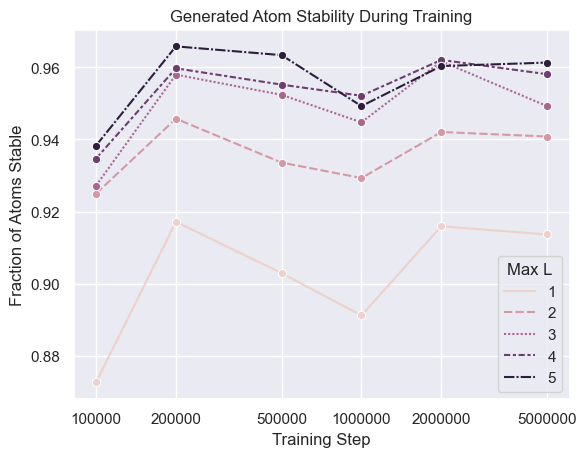

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.43082755198027817, 0.24984535814964698, 0.4439396089963985],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [63]:
edm_analyses_results["step"] = edm_analyses_results["step"].astype(int)

sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=edm_analyses_results,
    x="step",
    y="fraction_atoms_stable",
    hue="max_l",
    style="max_l",
    marker="o",
)
plt.xscale("log")
plt.xticks(ticks=edm_analyses_results["step"].unique(), labels=edm_analyses_results["step"].unique())
plt.legend(title="Max L")
plt.xlabel("Training Step")
plt.ylabel("Fraction of Atoms Stable")
plt.title("Generated Atom Stability During Training")
# plt.savefig("../plots/qm9_atom_stability.pdf")
plt.show();

sns.cubehelix_palette(n_colors=5)[:]

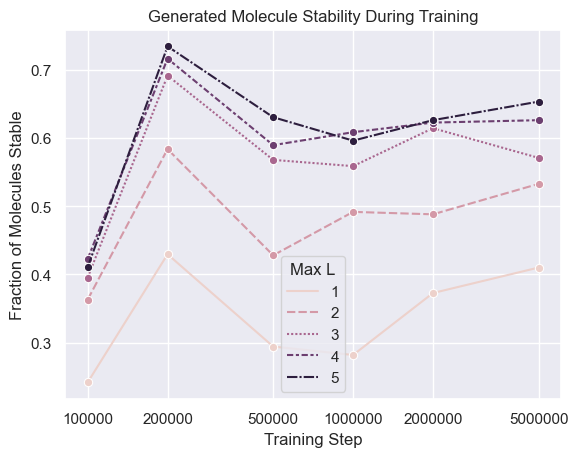

In [33]:
edm_analyses_results["step"] = edm_analyses_results["step"].astype(int)

sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=edm_analyses_results,
    x="step",
    y="fraction_molecules_stable",
    hue="max_l",
    style="max_l",
    marker="o",
)
plt.xscale("log")
plt.xticks(ticks=edm_analyses_results["step"].unique(), labels=edm_analyses_results["step"].unique())
plt.legend(title="Max L")
plt.xlabel("Training Step")
plt.ylabel("Fraction of Molecules Stable")
plt.title("Generated Molecule Stability During Training")
plt.savefig("../plots/qm9_molecule_stability.pdf")
plt.show();

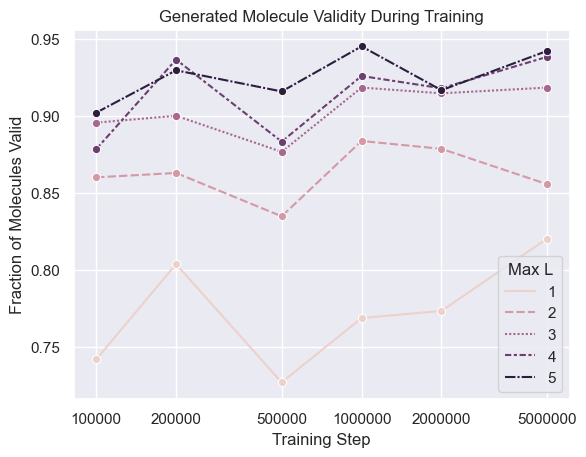

In [32]:
edm_analyses_results["step"] = edm_analyses_results["step"].astype(int)

sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=edm_analyses_results,
    x="step",
    y="fraction_valid",
    hue="max_l",
    style="max_l",
    marker="o",
)
plt.xscale("log")
plt.xticks(ticks=edm_analyses_results["step"].unique(), labels=edm_analyses_results["step"].unique())
plt.legend(title="Max L")
plt.xlabel("Training Step")
plt.ylabel("Fraction of Molecules Valid")
plt.title("Generated Molecule Validity During Training")
plt.savefig("../plots/qm9_molecule_validity.pdf")
plt.show();

# Merged Results

In [ ]:
# Join results and edm_analyses_results on (max_l, position_channels).
merged_results = results.merge(edm_analyses_results, on=["max_l", "config.target_position_predictor.num_channels", "model", "config.num_channels", "config.num_interactions"], suffixes=('', ''))
merged_results

In [ ]:
sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=merged_results,
    x="num_params",
    y="fraction_molecules_stable",
    hue="max_l",
    style="max_l",
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Fraction of Molecules Stable")
plt.title("QM9")
plt.show();

In [ ]:
sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=merged_results,
    x="num_params",
    y="fraction_atoms_stable",
    hue="max_l",
    style="max_l",
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Fraction of Atoms Stable")
plt.title("QM9")
plt.show();

In [ ]:
sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=merged_results,
    x="num_params",
    y="num_generated",
    hue="max_l",
    style="max_l",
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Number of Molecules Generated")
plt.title("QM9")
plt.show();

In [ ]:
sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=merged_results,
    x="num_params",
    y="fraction_valid",
    hue="max_l",
    style="max_l",
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Fraction Valid of All Molecules Generated")
plt.title("QM9")
plt.show();

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(
    data=merged_results,
    x="num_params",
    y="fraction_unique_of_valid",
    hue="max_l",
    style="max_l", 
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Fraction Unique of Valid Molecules Generated")
plt.title("QM9")
plt.show();

In [ ]:
sns.set_theme(style="darkgrid")
# Set marker sizes depending on max_l.
sns.lineplot(
    data=merged_results,
    x="num_params",
    y="fraction_novel_of_valid_and_unique",
    hue="max_l",
    style="max_l",
    markersize=10,
    markers=True,
    dashes=True,
)
# Set legend title as Max L.
plt.legend(title="Max L")
# Set axis labels.
plt.xlabel("Number of Parameters")
plt.ylabel("Fraction Novel of Valid and Unique Molecules Generated")
plt.title("QM9")
plt.show();